In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd

df = pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/data_ab_test.xlsx', sheet_name='data')

#indexNames = df[ df['nr_clicks'] > df['nr_impressions'] ].index
#df.drop(indexNames , inplace=True)


In [ ]:
df['CTR']  =   df['nr_clicks']/df['nr_impressions']

df

platform       date  ... nr_clicks       CTR
0           App 2020-06-19  ...         1  0.058824
2           Web 2020-06-19  ...         1  0.006061
3           App 2020-06-19  ...         3  0.066667
4           App 2020-06-19  ...         0  0.000000
5           App 2020-06-19  ...         1  0.001988
...         ...        ...  ...       ...       ...
857162      Web 2020-06-18  ...         0  0.000000
857163      App 2020-06-18  ...         1  0.050000
857164      App 2020-06-18  ...         0  0.000000
857165      App 2020-06-18  ...         1  0.050000
857166      App 2020-06-18  ...         1  0.003876

[807073 rows x 8 columns]

In [ ]:

import numpy as np
df_app_search = df[(df['platform'] == 'App') & (df['catalog_page_type'] == 'Search') ]
df_web_search = df[(df['platform'] == 'Web') & (df['catalog_page_type'] == 'Search') ]
df_web_category = df[(df['platform'] == 'Web') & (df['catalog_page_type'] == 'Category') ]
df_app_category = df[(df['platform'] == 'App') & (df['catalog_page_type'] == 'Category') ]
#measurements for the variant app searc
num_a_app_search = np.sum(df_app_search[df_app_search.version == 'A'].nr_impressions)

num_b_app_search = np.sum(df_app_search[df_app_search.version == 'B'].nr_impressions)

click_a_app_search =  np.sum(df_app_search[df_app_search.version == 'A'].nr_clicks)

click_b_app_search = np.sum(df_app_search[df_app_search.version == 'B'].nr_clicks)

rate_a_app_search , rate_b_app_search  = click_a_app_search / num_a_app_search, click_b_app_search / num_b_app_search

#measurement for the variant web search
num_a_web_search = np.sum(df_web_search[df_web_search.version == 'A'].nr_impressions)

num_b_web_search = np.sum(df_web_search[df_web_search.version == 'B'].nr_impressions)

click_a_web_search =  np.sum(df_web_search[df_web_search.version == 'A'].nr_clicks)

click_b_web_search = np.sum(df_web_search[df_web_search.version == 'B'].nr_clicks)

rate_a_web_search , rate_b_web_search  = click_a_web_search / num_a_web_search, click_b_web_search / num_b_web_search

#measurement for the variant web_category

num_a_web_category = np.sum(df_web_category[df_web_category.version == 'A'].nr_impressions)

num_b_web_category = np.sum(df_web_category[df_web_category.version == 'B'].nr_impressions)

click_a_web_category =  np.sum(df_web_category[df_web_category.version == 'A'].nr_clicks)

click_b_web_category = np.sum(df_web_category[df_web_category.version == 'B'].nr_clicks)

rate_a_web_category , rate_b_web_category  = click_a_web_category / num_a_web_category, click_b_web_category / num_b_web_category


#measurements for the variant app category
num_a_app_category = np.sum(df_app_category[df_app_category.version == 'A'].nr_impressions)


num_b_app_category = np.sum(df_app_category[df_app_category.version == 'B'].nr_impressions)

click_a_app_category =  np.sum(df_app_category[df_app_category.version == 'A'].nr_clicks)

click_b_app_category = np.sum(df_app_category[df_app_category.version == 'B'].nr_clicks)


rate_a_app_category , rate_b_app_category  = click_a_app_category / num_a_app_category, click_b_app_category / num_b_app_category




<Figure size 864x504 with 0 Axes>

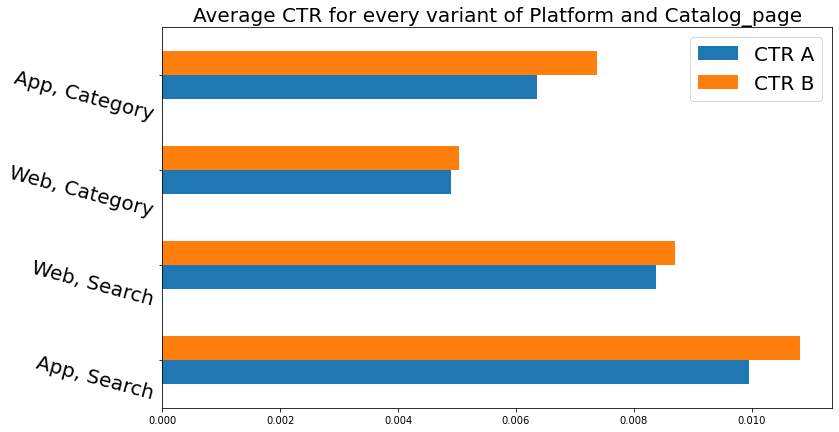

In [ ]:
import matplotlib.pyplot as plt


data = {"CTR A": [rate_a_app_search,  rate_a_web_search, rate_a_web_category, rate_a_app_category],

        "CTR B": [rate_b_app_search,  rate_b_web_search, rate_b_web_category, rate_b_app_category]

        };

index     = ['App, Search' , 'Web, Search' , 'Web, Category' , 'App, Category'];

 

# Python Dictionary loaded into a DataFrame

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a stacked horizontal bar chart
fig = plt.figure(1, figsize=(12, 7))
dataFrame.plot.barh(stacked=False,rot=-15, title="Number of clicks and impressions for each version", figsize=(12, 7));
plt.title('Average CTR for every variant of Platform and Catalog_page', fontsize=20)
plt.legend(loc= 1, prop={'size': 20})
plt.yticks(fontsize=20 )
plt.show(block=True);

In [ ]:
df = df_app_category
import numpy as np


num_a = np.sum(df[df.version == 'A'].nr_impressions)


num_b = np.sum(df[df.version == 'B'].nr_impressions)

click_a =  np.sum(df[df.version == 'A'].nr_clicks)

click_b = np.sum(df[df.version == 'B'].nr_clicks)


rate_a , rate_b  = click_a / num_a, click_b / num_b
print(rate_a*100,  rate_b*100)

0.6359676586417362 0.7381782195472005


In [ ]:
num_a,  num_b   

(33968394, 24169773)

In [ ]:
max(click_a , click_b)

216028

<Figure size 864x504 with 0 Axes>

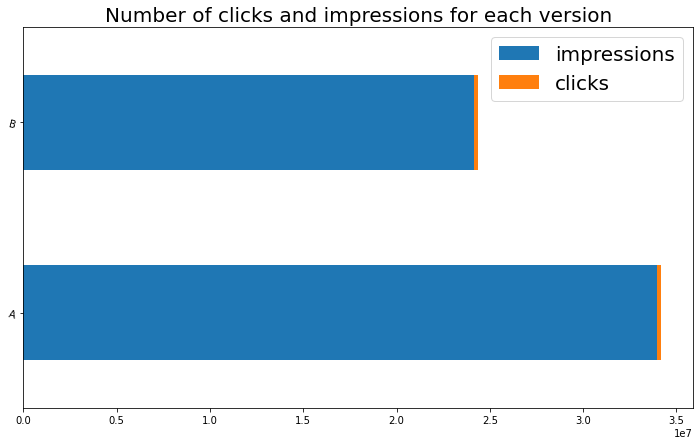

In [ ]:
import matplotlib.pyplot as plt


data = {"impressions": [num_a,  num_b],

        "clicks": [click_a,  click_b]

        };

index     = ['A' , 'B'];

 

# Python Dictionary loaded into a DataFrame

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a stacked horizontal bar chart
fig = plt.figure(1, figsize=(12, 7))
dataFrame.plot.barh(stacked=True,rot=-15, title="Number of clicks and impressions for each version", figsize=(12, 7));
plt.title('Number of clicks and impressions for each version', fontsize=20)
plt.legend(loc= 1, prop={'size': 20})

plt.show(block=True);

AttributeError: ignored

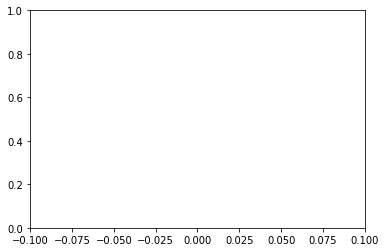

In [ ]:
import seaborn as sns
plt.clf()
plt.xlim(-0.1, 0.1)
sns.distplot(df[df['version'] == 'A'].CTR)


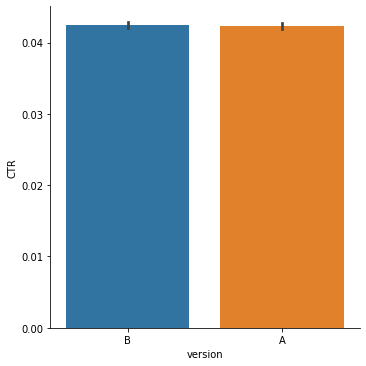

In [ ]:
sns.catplot(x="version", y="CTR", data=df, kind='bar',ci=95)

sns.plt.title('Average CTR')


plt.show()


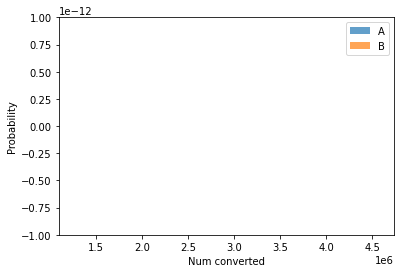

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

# Determine the probability of having x number of click throughs
click = np.linspace(1265000, 2565000, 100)

prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");


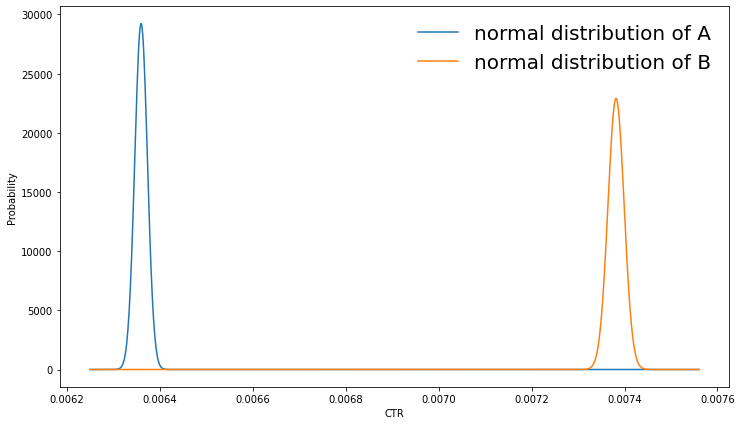

In [ ]:

import matplotlib.pyplot as plt

import numpy
from scipy.stats import norm

# Where does this come from? See the link above.
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0.00625, 0.00756, 1000)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.

fig = plt.figure(1, figsize=(12, 7))
plt.plot(click_rate, prob_a, label="normal distribution of A")
plt.plot(click_rate, prob_b, label="normal distribution of B")
plt.legend(frameon=False, fontsize=20)
plt.xlabel("CTR"); plt.ylabel("Probability");

 What is the chance that a draw from B is higher than a draw from A. Is it significant?

 To answer this, let us utilise the handy fact that the sum (or difference) of normally distributed random numbers is also a normal.

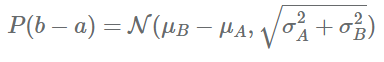
 

In [ ]:
np.sqrt(std_a**2 + std_b**2)

2.211768462078548e-05

In [ ]:
(rate_b - rate_a)/np.sqrt(std_a**2 + std_b**2)

46.2121432048137

zscore is 46.212, with p-value 0.000000000000000


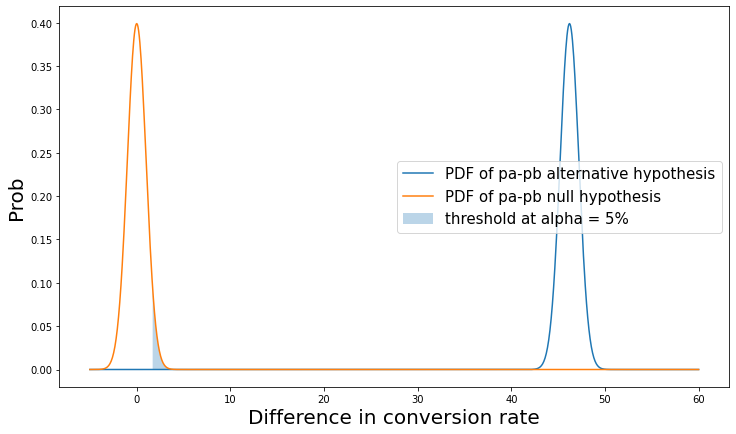

In [ ]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm((rate_b - rate_a)/np.sqrt(std_a**2 + std_b**2), 1)

p1 = norm(0, 1)
fig = plt.figure(1, figsize=(12, 7))

x = np.linspace(-5, 60, 1000)

#x = np.linspace(-3.21e-05 - 0.0004, -3.21e-05+ 0.002, 1000)
y = p.pdf(x)

y1 = p1.pdf(x)
area_under_curve = p.sf(0)

plt.fill_between(x, 0, y1, where=1.65< x , label="threshold at alpha = 5%", alpha=0.3)

#ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')

plt.plot(x, y, label="PDF of pa-pb alternative hypothesis")

plt.plot(x, y1, label="PDF of pa-pb null hypothesis")


#plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend(loc= 5, fontsize=15)
plt.xlabel("Difference in conversion rate",fontsize=20); plt.ylabel("Prob", fontsize=20);

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.15f}")